# Near Earth Asteroid Distribution

 We want to know how many asteroids we can capture and work with. Mostly these are asteroids that have a similar orbit to Earth so we will start with those.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


/Users/galois/.pyenv/versions/3.6.9/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['font.size'] = 20

In [20]:
data = pd.read_csv('./results.csv')

In [21]:
data

name      moid  diameter         e         a         q          i  \
0         Eros  0.148623    16.840  0.222951  1.458046  1.132973  10.830541   
1       Albert  0.203482       NaN  0.546558  2.638602  1.196452  11.567485   
2       Alinda  0.082217     4.200  0.570332  2.473737  1.062886   9.393853   
3      Ganymed  0.344956    37.675  0.533046  2.664725  1.244304  26.677641   
4         Amor  0.107450     1.000  0.435285  1.919498  1.083969  11.876540   
...        ...       ...       ...       ...       ...       ...        ...   
24043      NaN  0.256273       NaN  0.607193  3.136030  1.231854  20.798493   
24044      NaN  0.021759       NaN  0.488154  1.902106  0.973586   9.733673   
24045      NaN  0.009827       NaN  0.212497  0.875315  0.689313   2.340292   
24046      NaN  0.041296       NaN  0.301786  1.123504  0.784446   3.032461   
24047      NaN  0.035589       NaN  0.662446  2.817152  0.950941   4.679278   

               om           w          ma  
0      304.299326  178.882296  271.071733  
1      183.866950  156.176338  140.273422  
2      110.434252  350.495544  294.579169  
3      215.546828  132.364633    4.817744  
4      171.327012   26.694788   38.522411  
...           ...         ...         ...  
24043   35.195877   19.880670  354.275790  
24044   25.369085  326.591373    9.549500  
24045   28.559683  205.557967  326.361581  
24046  235.904317   33.776666   69.313180  
24047  182.982832  234.894852  240.473601  

[24048 rows x 10 columns]

24048 known NEOs

Text(0.5, 1.0, 'Minimum Distance to Earth of Known Near Earth Asteroids(Cumulative)')

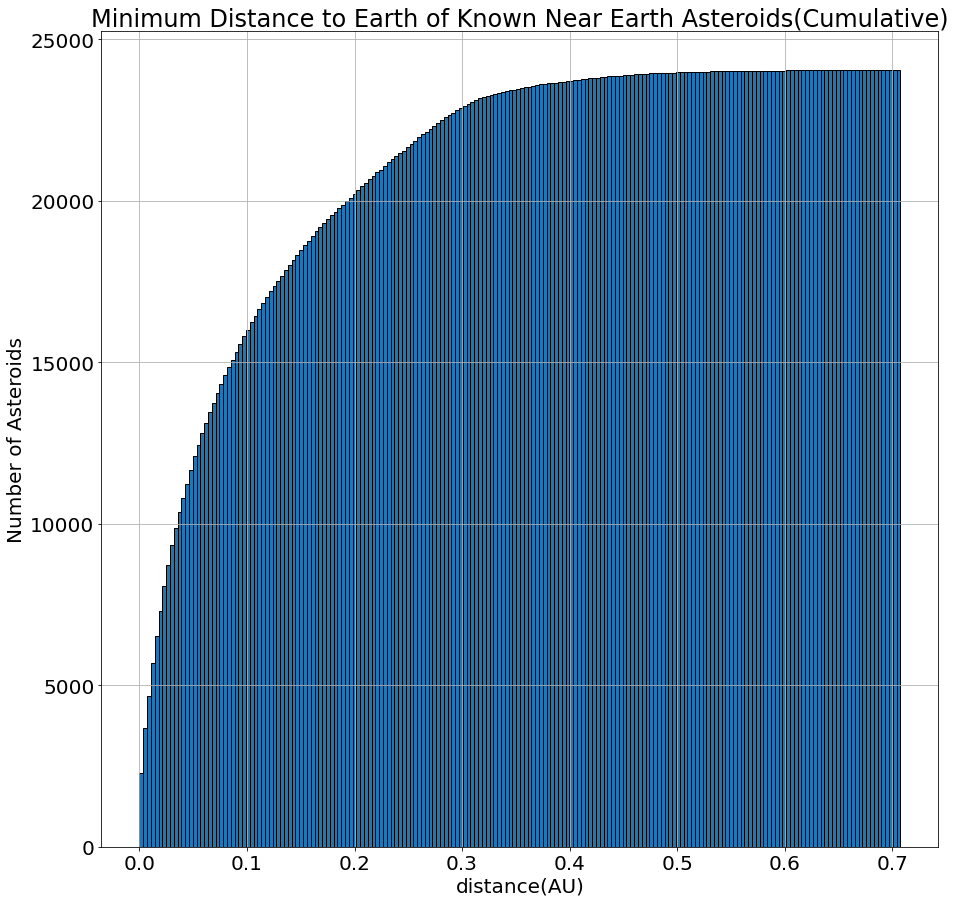

In [12]:
data['moid'].hist(bins=200,edgecolor='k',cumulative=True)
plt.xlabel("distance(AU)")
plt.ylabel("Number of Asteroids")
plt.title("Minimum Distance to Earth of Known Near Earth Asteroids(Cumulative)")

Text(0.5, 1.0, 'Distribution of Near Earth Asteroids')

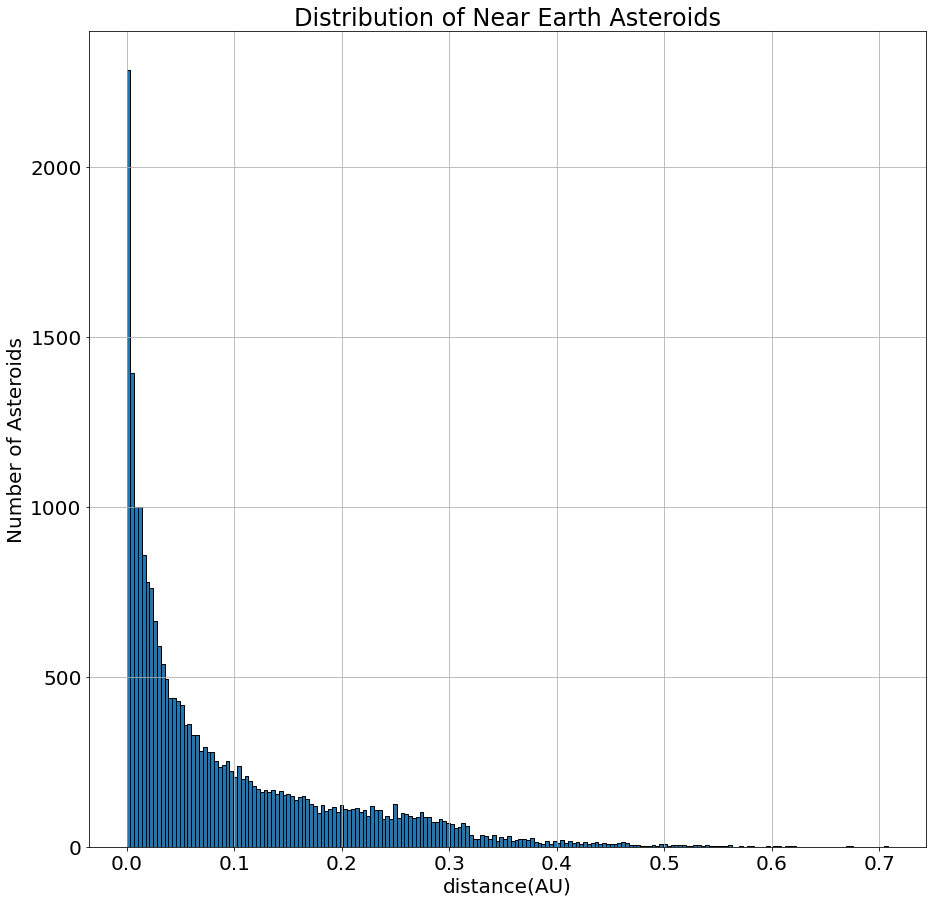

In [11]:
data['moid'].hist(bins=200,edgecolor='k',cumulative=False)
plt.xlabel("distance(AU)")
plt.ylabel("Number of Asteroids")
plt.title("Distribution of Near Earth Asteroids")

Text(0.5, 1.0, 'Radius of Known Near Earth Asteroids')

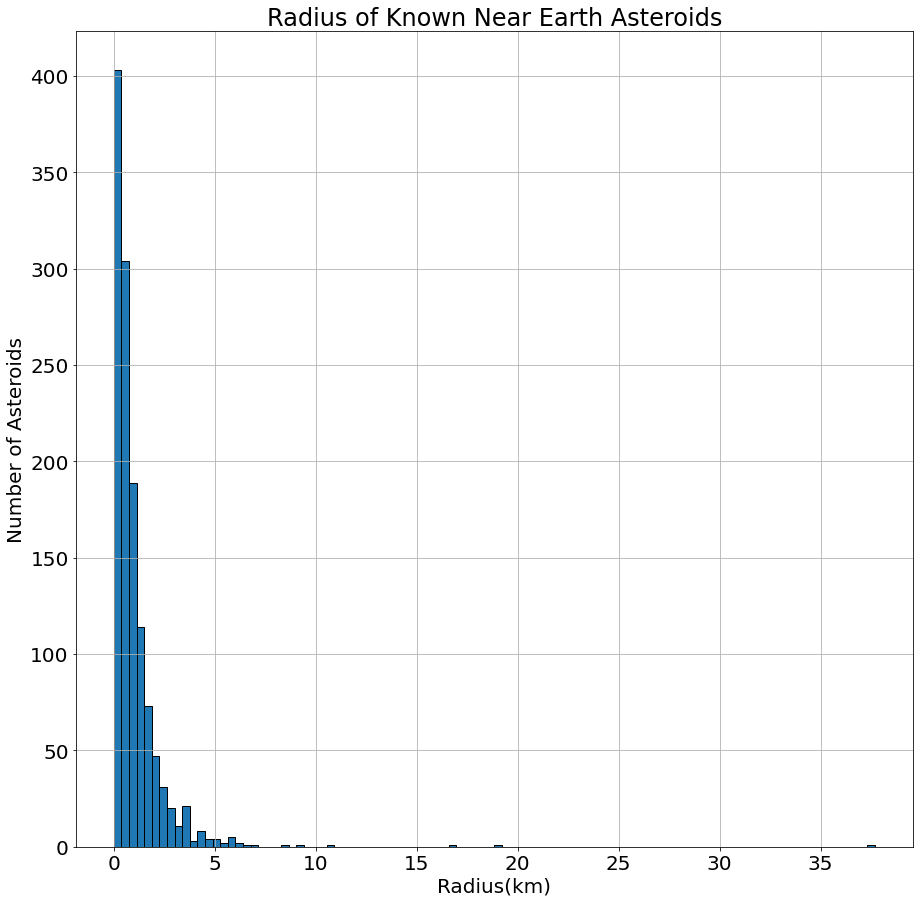

In [49]:
data.hist('diameter',bins=100,edgecolor="k")
plt.xlabel("Radius(km)")
plt.ylabel("Number of Asteroids")
plt.title("Radius of Known Near Earth Asteroids")

Text(0.5, 1.0, 'Radius of Known Near Earth Asteroids')

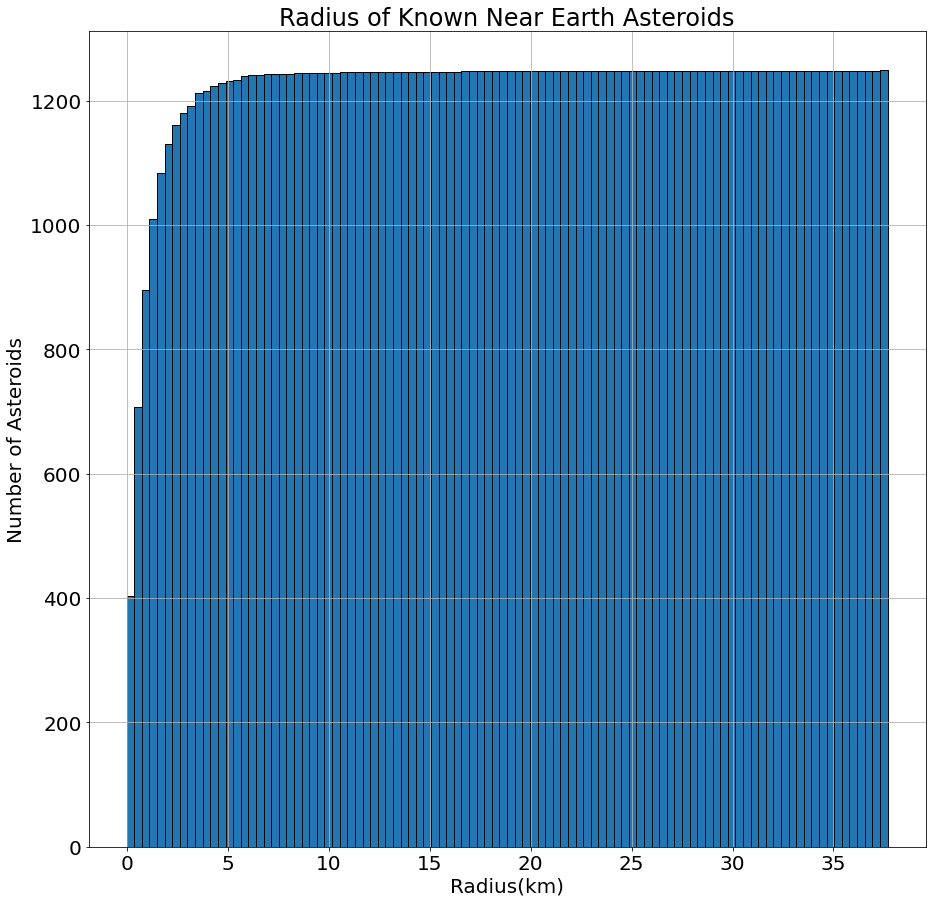

In [48]:
data.hist('diameter',bins=100,cumulative=True,edgecolor="k")
plt.xlabel("Radius(km)")
plt.ylabel("Number of Asteroids")
plt.title("Radius of Known Near Earth Asteroids")

In [1]:
import astropy.units as u

In [2]:
from poliastro.twobody import Orbit

In [3]:
from poliastro.bodies import Earth, Mars, Sun

In [26]:
from poliastro.plotting import OrbitPlotter2D

/Users/galois/.pyenv/versions/3.6.9/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [30]:
Op = OrbitPlotter2D()

In [24]:
asteroid1 = data.iloc[0]
a = asteroid1['a'] * u.AU
ecc = asteroid1['e'] * u.one
inc =  asteroid1['i'] * u.deg
raan = asteroid1['om'] * u.deg
argp = asteroid1['w'] * u.deg
nu = asteroid1['ma'] * u.deg

orb1 = Orbit.from_classical(Sun,a,ecc,inc,raan,argp,0*u.deg)

In [36]:
# Data from Curtis, example 4.3
r = [-6045, -3490, 2500] * u.km
v = [-3.457, 6.618, 2.533] * u.km / u.s

orb = Orbit.from_vectors(Earth, r, v)

In [44]:
orb.epoch.out_subfmt

'*'

In [46]:
orb.plot(interactive=True)

ValueError: subformat not allowed for format jyear_str

In [33]:
orb1

1 x 2 AU x 10.8 deg (HCRS) orbit around Sun (☉) at epoch J2000.000 (TT)

In [35]:
orb1.epoch.

<Time object: scale='tt' format='jyear_str' value=J2000.000>

ValueError: subformat not allowed for format jyear_str

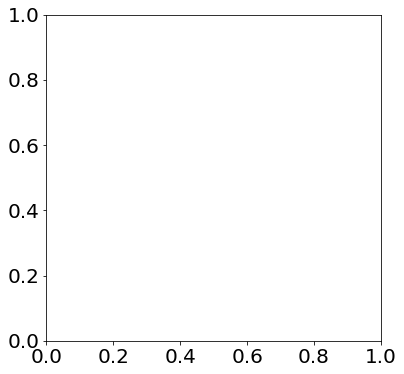

In [34]:
orb1.plot()

In [31]:
Op.plot(orb1)

ValueError: subformat not allowed for format jyear_str